<center><h1 class="list-group-item list-group-item-success">Medical Cost Prediction</h1></center><br><br>

<img src = "https://i.postimg.cc/HnVfdKsj/med-1.jpg">

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [3]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from prettytable import PrettyTable

# Loading data

In [5]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\MedicalCostsData.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* There are a total of 1338 rows and there are no null values in the dataset.

#### age

minimum age: 18, maximum age: 64


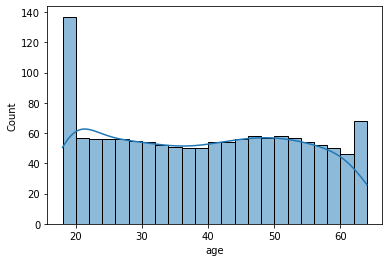

In [8]:
print(f"minimum age: {df['age'].min()}, maximum age: {df['age'].max()}")
sns.histplot(df, x = "age", bins = 23, kde = True)
plt.show()

* From the above figure, we can see that, in most of the age bin ranges, the distribution of population in age bins is almost uniform except in first and last bin.

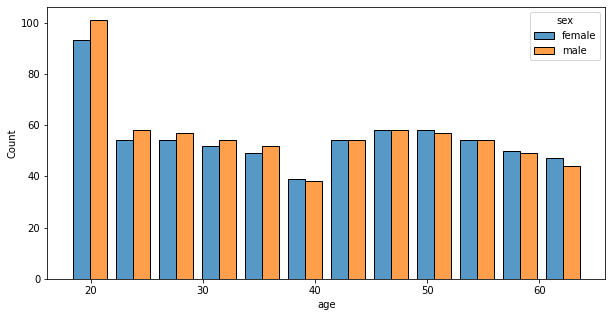

In [9]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "age", hue = "sex", multiple = "dodge", shrink = .8)
plt.show()

* From the above figure, we can see that, in each bin, male and female are almost equal.

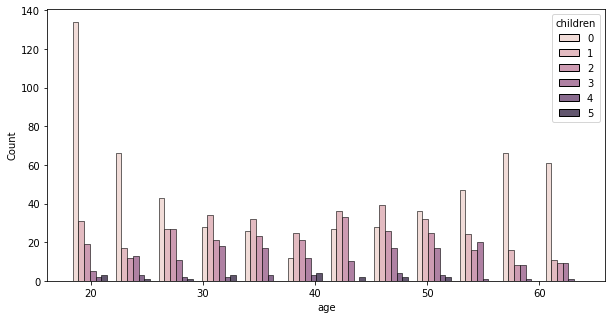

In [10]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "age", hue = "children", multiple = "dodge", shrink = .8)
plt.show()

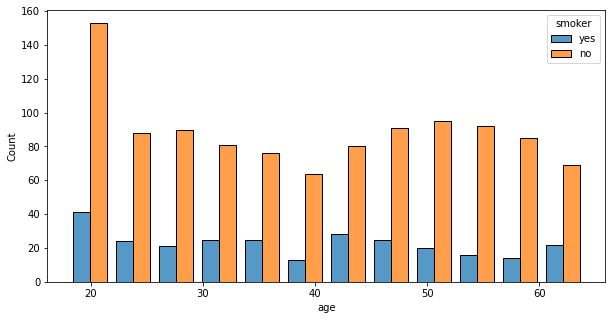

In [11]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "age", hue = "smoker", multiple = "dodge", shrink = .8)
plt.show()

* From the above figure, we can see that, in each bin, the population of smokers is around 1/3rd of non-smokers.

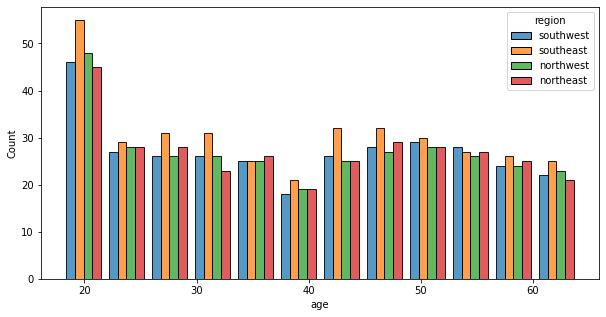

In [12]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "age", hue = "region", multiple = "dodge", shrink = .8)
plt.show()

* From the above figure, we can see that, in each bin, there are almost equal population from every region.

#### bmi

minimum BMI: 15.96, maximum BMI: 53.13


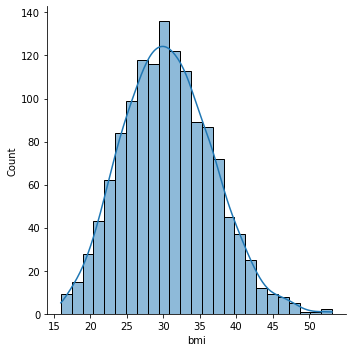

In [13]:
print(f"minimum BMI: {df['bmi'].min()}, maximum BMI: {df['bmi'].max()}")
sns.displot(df, x = "bmi", kde = True)
plt.show()

<Figure size 720x360 with 0 Axes>

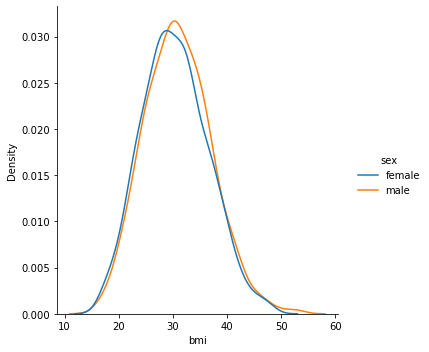

In [14]:
plt.figure(figsize = (10, 5))
sns.displot(df, x = "bmi", hue = "sex", kind = "kde")
plt.show()

* From the above figure, we can see that, male and female bmi distribution is similar.

<Figure size 720x360 with 0 Axes>

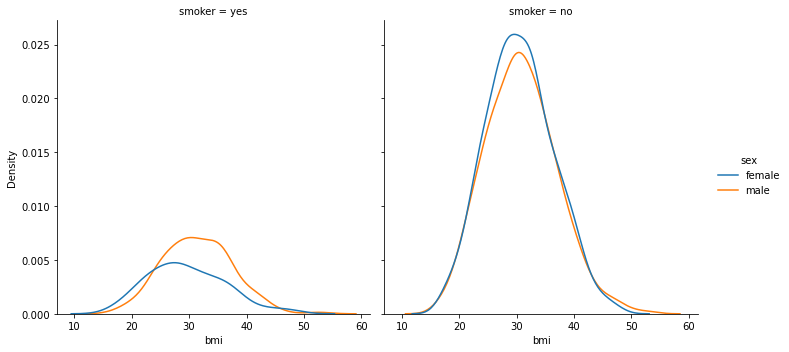

In [15]:
plt.figure(figsize = (10, 5))
sns.displot(df, x = "bmi", hue = "sex", kind = "kde", col = "smoker")
plt.show()

<Figure size 720x504 with 0 Axes>

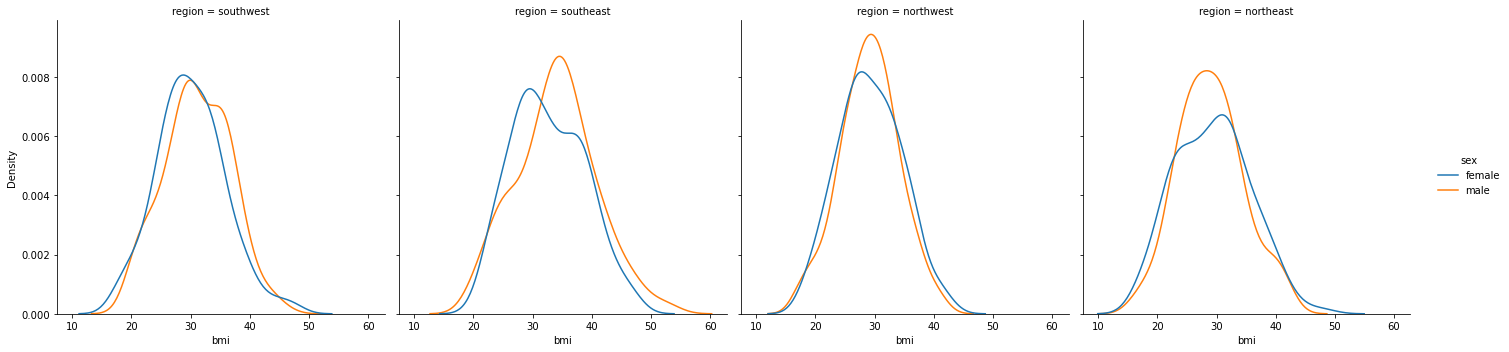

In [16]:
plt.figure(figsize = (10, 7))
sns.displot(df, x = "bmi", hue = "sex", kind = "kde", col = "region")
plt.show()

#### region

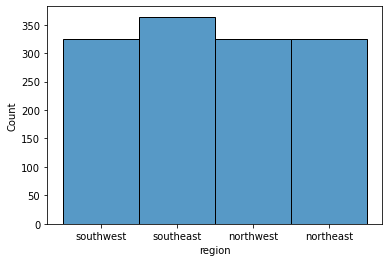

In [17]:
sns.histplot(df, x = "region")
plt.show()

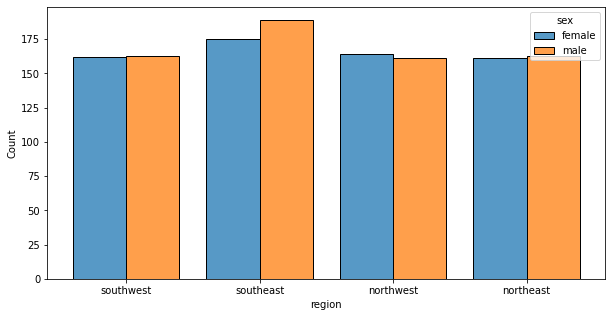

In [18]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "region", hue = "sex", multiple = "dodge", shrink = .8)
plt.show()

* From the above figure, we can see that, from each region the male and female population is almost equal.

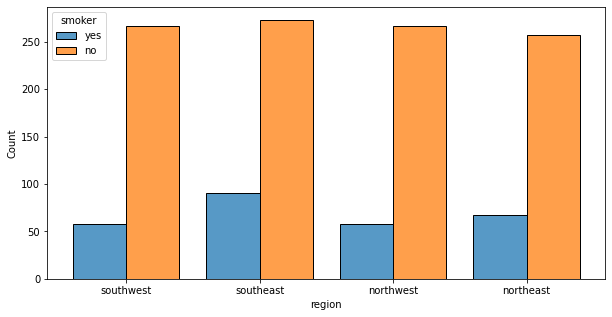

In [19]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "region", hue = "smoker", multiple = "dodge", shrink = .8)
plt.show()

* From the above figure, we can see that, in each region, the ratio of smoker to non-smoker is almost equal.

#### charges

minimum charge: 1121.8739, maximum charge: 63770.42801


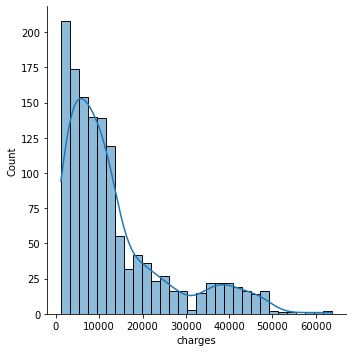

In [20]:
print(f"minimum charge: {df['charges'].min()}, maximum charge: {df['charges'].max()}")
sns.displot(df, x = "charges", kde = True)
plt.show()

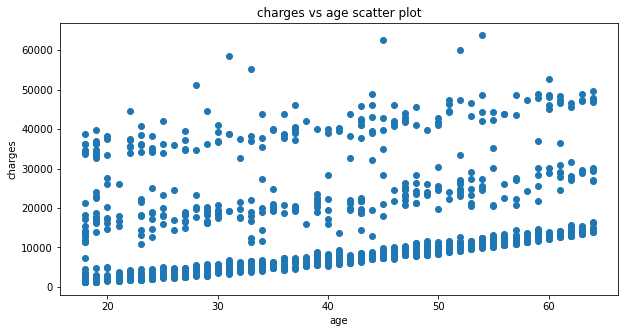

In [21]:
plt.figure(figsize = (10, 5))
plt.scatter(df["age"], df["charges"])
plt.xlabel("age")
plt.ylabel("charges")
plt.title("charges vs age scatter plot")
plt.show()

* From the above figure, we can see that, as the age increases the charges increases. We can see an upward trend in charges. This is obvious as the age increses the chance of getting illness increases and medical charges increses.

<Figure size 720x360 with 0 Axes>

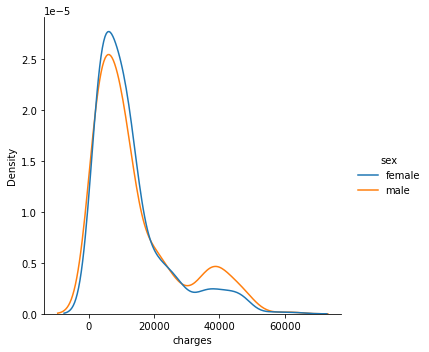

In [22]:
plt.figure(figsize = (10, 5))
sns.displot(df, x = "charges", hue = "sex", kind = "kde")
plt.show()

<Figure size 720x360 with 0 Axes>

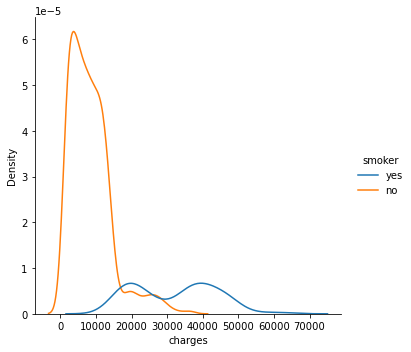

In [23]:
plt.figure(figsize = (10, 5))
sns.displot(df, x = "charges", hue = "smoker", kind = "kde")
plt.show()

From the above figure, we can see that, smokers pay high charges when compared to non-smokers.

<Figure size 720x504 with 0 Axes>

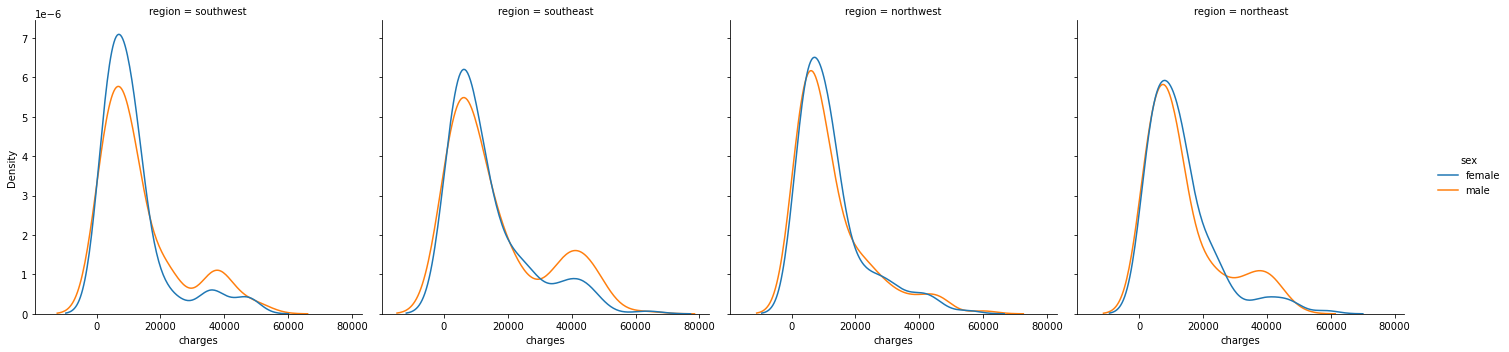

In [24]:
plt.figure(figsize = (10, 7))
sns.displot(df, x = "charges", hue = "sex", kind = "kde", col = "region")
plt.show()

In [25]:
df_expanded = pd.get_dummies(df)
df_expanded.drop(columns = ["sex_male", "smoker_no"], inplace = True)
df_expanded.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [26]:
train, test = train_test_split(df_expanded, test_size = .25)

train.shape, test.shape

((1003, 10), (335, 10))

In [27]:
x_train = train.drop(columns = ["charges"])
x_test = test.drop(columns = ["charges"])
y_train = np.array(train["charges"]).reshape(-1, 1)
y_test = np.array(test["charges"]).reshape(-1, 1)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaler.fit(x_train)
y_scaler.fit(y_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


x_train_scaled.shape, x_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((1003, 9), (335, 9), (1003, 1), (335, 1))

# Linear Regression

In [28]:
model = ElasticNet()
params = {"alpha": [.00001, .000033, .0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100], 
          "l1_ratio" : [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 165 candidates, totalling 825 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 3.3e-05, 0.0001, 0.00033, 0.001,
                                   0.0033, 0.01, 0.033, 0.1, 0.33, 1, 3.3, 10,
                                   33, 100],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [29]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035099,1.841077e-02,0.001482,0.001139,0.00001,0,"{'alpha': 1e-05, 'l1_ratio': 0}",-1.039201,-1.134836,-1.397637,...,1.226222,0.219165,158,-1.277510,-1.176851,-1.133829,-1.240474,-1.065641,1.178861,0.075337
1,0.008394,5.674093e-03,0.000586,0.000479,0.00001,0.1,"{'alpha': 1e-05, 'l1_ratio': 0.1}",-1.039198,-1.134834,-1.397632,...,1.226218,0.219165,157,-1.277507,-1.176845,-1.133826,-1.240469,-1.065638,1.178857,0.075337
2,0.001592,4.851456e-04,0.001197,0.000747,0.00001,0.2,"{'alpha': 1e-05, 'l1_ratio': 0.2}",-1.039194,-1.134831,-1.397627,...,1.226214,0.219166,156,-1.277504,-1.176839,-1.133824,-1.240463,-1.065634,1.178853,0.075337
3,0.001197,3.991605e-04,0.002194,0.002475,0.00001,0.3,"{'alpha': 1e-05, 'l1_ratio': 0.3}",-1.039190,-1.134829,-1.397622,...,1.226210,0.219166,155,-1.277501,-1.176832,-1.133822,-1.240458,-1.065631,1.178849,0.075336
4,0.000997,3.568323e-07,0.000798,0.000399,0.00001,0.4,"{'alpha': 1e-05, 'l1_ratio': 0.4}",-1.039186,-1.134827,-1.397617,...,1.226205,0.219167,154,-1.277498,-1.176826,-1.133820,-1.240452,-1.065627,1.178845,0.075336


In [30]:
# Params
l1_ratio = .1
alpha = 1

In [31]:
model = ElasticNet(l1_ratio = l1_ratio, alpha = alpha)
model.fit(x_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mean_squared_error(y_test, y_pred, squared = False), mean_absolute_percentage_error(y_test, y_pred)

(8619.917909381817, 1.0033543656078332)

# kNN Regressor

In [32]:
model = KNeighborsRegressor()
params = {"n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45], 
          "weights" : ["uniform", "distance"]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 46 candidates, totalling 230 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45],
                         'weights': ['uniform', 'distance']},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [33]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003601,0.001513,0.003132,0.001116,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",-0.821122,-0.899368,-1.259643,...,1.394821,0.649748,44,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.002624,0.000453,0.002562,0.000467,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",-0.821122,-0.899368,-1.259643,...,1.394821,0.649748,44,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
2,0.002762,0.000388,0.002793,0.000400,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",-1.024944,-0.919585,-1.116104,...,1.434291,0.515548,46,-0.892133,-0.875618,-0.881866,-0.804358,-0.725868,0.835968,0.063174
3,0.002193,0.000399,0.003287,0.000366,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",-0.824822,-0.755185,-1.043138,...,1.272036,0.497119,30,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
4,0.002194,0.000402,0.003576,0.000477,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",-0.904828,-0.865089,-1.187153,...,1.186356,0.343695,27,-1.216975,-1.145306,-1.037295,-1.016296,-1.005859,1.084346,0.082839


In [34]:
n_neighbors = 17
weights = "distance"

In [35]:
model = KNeighborsRegressor(n_neighbors = n_neighbors, weights = weights)
model.fit(x_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mean_squared_error(y_test, y_pred, squared = False), mean_absolute_percentage_error(y_test, y_pred)

(5900.163620067739, 0.431086699078908)

# SVM Regressor

In [36]:
model = SVR()
params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], 
          "C" : [.00001, .000033, .0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1e-05, 3.3e-05, 0.0001, 0.00033, 0.001, 0.0033,
                               0.01, 0.033, 0.1, 0.33, 1, 3.3, 10, 33, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [ ]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048430,0.003084,0.007282,0.000118,1e-05,linear,"{'C': 1e-05, 'kernel': 'linear'}",-1.499551,-1.896522,-6.015751,-1.553286,-15.682342,5.329490,5.447310,45,-6.361185,-5.972385,-5.112256,-6.645173,-2.743494,5.366899,1.409702
1,0.049187,0.007576,0.008310,0.000913,1e-05,poly,"{'C': 1e-05, 'kernel': 'poly'}",-1.510600,-1.912593,-6.050898,-1.560588,-15.850051,5.376946,5.507361,53,-6.446685,-6.031670,-5.158685,-6.692102,-2.764443,5.418717,1.425954
2,0.068231,0.005794,0.017186,0.001319,1e-05,rbf,"{'C': 1e-05, 'kernel': 'rbf'}",-1.510424,-1.912597,-6.049668,-1.560560,-15.844675,5.375585,5.505314,52,-6.444530,-6.030927,-5.157793,-6.691094,-2.763870,5.417643,1.425645
3,0.078028,0.003308,0.014933,0.001243,1e-05,sigmoid,"{'C': 1e-05, 'kernel': 'sigmoid'}",-1.509941,-1.911641,-6.049373,-1.560234,-15.833732,5.372984,5.501378,51,-6.441108,-6.028068,-5.156331,-6.689354,-2.762523,5.415477,1.425151
4,0.043296,0.004642,0.008581,0.003113,3.3e-05,linear,"{'C': 3.3e-05, 'kernel': 'linear'}",-1.476769,-1.851682,-5.894457,-1.535064,-15.297558,5.211106,5.309384,41,-6.184136,-5.807364,-4.969872,-6.529355,-2.695175,5.237180,1.372938


In [37]:
C = 1
kernel = "poly"

In [38]:
model = SVR(C = C, kernel = kernel)
model.fit(x_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mean_squared_error(y_test, y_pred, squared = False), mean_absolute_percentage_error(y_test, y_pred)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(4919.547635763853, 0.18837833681408908)

* From feature importance, we can see that, a smoker pays more charges and has highest influence on medical charges. Intuitively, there is a higher probability that a smoker has health issues and goes to hospital, so medical charges increases.
* As age increases, the probability of getting health issues increases, so this effects medical charges.
* BMI also has an effect on charges as observed from feature importance.
* Important thing to note is our model has a very very small bias towards gender and region when compared to smoker.

In [9]:
# Comparing results of different models
p = PrettyTable(["Model", "test MAPE"])
p.add_row(["Linear Regression with L1 \nand L2 regularization", "0.9429"])
p.add_row(["kNN Regressor", "0.3386"])
p.add_row(["SVM Regressor", "0.2112"])
print(p)

+----------------------------+-----------+
|           Model            | test MAPE |
+----------------------------+-----------+
| Linear Regression with L1  |   0.9429  |
|   and L2 regularization    |           |
|       kNN Regressor        |   0.3386  |
|       SVM Regressor        |   0.2112  |
|  Random Forest Regressor   |   0.3064  |
|     XGBoost Regressor      |   0.2663  |
+----------------------------+-----------+
